import the libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import scipy.stats as stats



read the data

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
train_data.isnull().sum() # know the number of nulls in the dataset

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:

# Highlighting cell with nan values 
#train_data.style.highlight_null('red') # uncomennt to get the whole dataset  with red color on the null cells !!
train_data.dropna(inplace= True) #returen another dataframe with out nan ... if you want the change be on your dataframe ... use inplace=True
train_data.info()
#train_data.style.highlight_null('red')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_sc

In [7]:
train_data.isnull().sum()# get red of the nulls !!

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

delet the rows that have null values in any columns


In [8]:
train_data.dropna(subset=['price_range','ram','wifi','touch_screen','three_g','battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','sc_w','talk_time'], inplace=True)
print(train_data.shape)

(1991, 21)


see the correlation between these prameters .. as a first step of study

<AxesSubplot: >

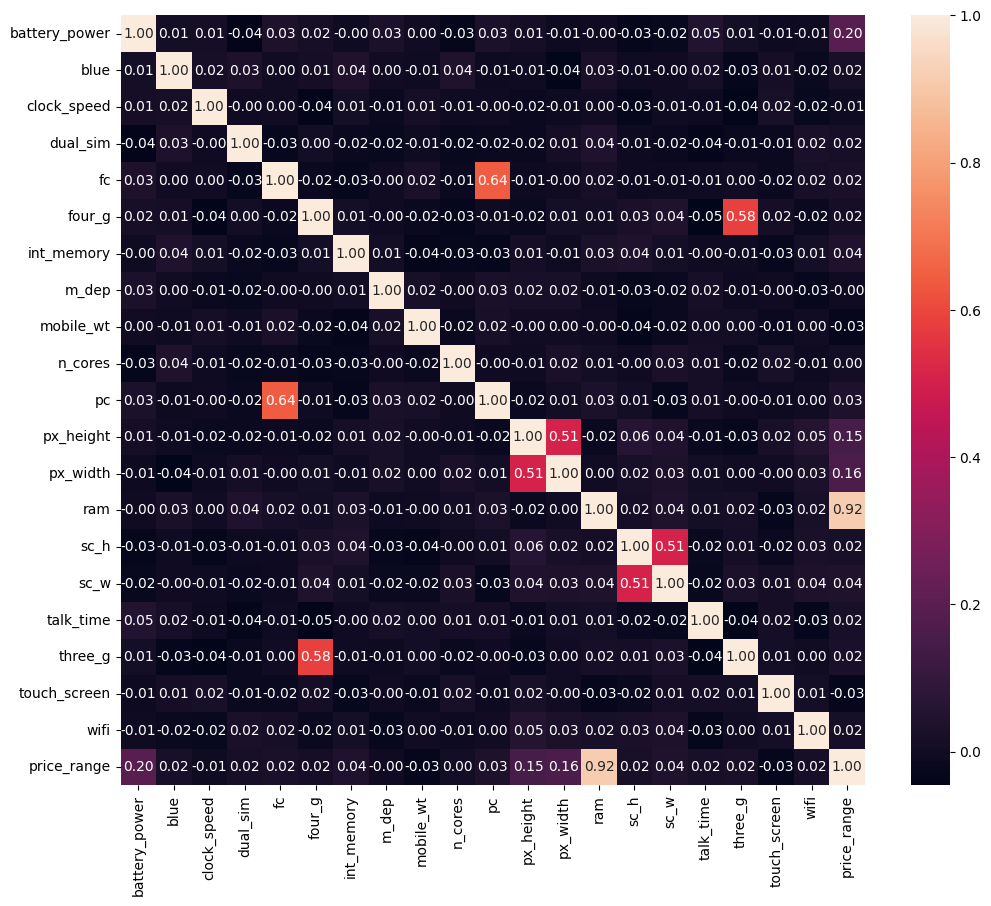

In [9]:
fig = plt.figure(figsize =(12,10)) # initialize the figure
np.set_printoptions(precision=2) #precision of output 
sns.heatmap(train_data.corr(), annot = True, fmt=".2f") # the heatmap .. the more light color is more corrolation is

In [10]:
#calculate point-biserial correlation
stats.pointbiserialr(train_data['price_range'], train_data['ram'])

PointbiserialrResult(correlation=0.9174475832238114, pvalue=0.0)

corrolation is very good and the p-value indecates that the price of the mobile highly corrlolated with the size of mobile phone

we can write the corrolation values .. code below

In [11]:
#Check Correlation Between Features and Target
corr = []
for a in train_data.columns :
    try :
        corr.append(train_data[a].corr(train_data["price_range"]))
        print(f'Corr {a}: {train_data[a].corr(train_data["price_range"])}')
    except :
        pass


Corr battery_power: 0.19927661929971435
Corr blue: 0.0213299185340659
Corr clock_speed: -0.00667487571189172
Corr dual_sim: 0.019107670960326947
Corr fc: 0.024737796611720788
Corr four_g: 0.015537095670547325
Corr int_memory: 0.04181221568519289
Corr m_dep: -0.0013962158506879469
Corr mobile_wt: -0.03216753318796683
Corr n_cores: 0.004661578370450969
Corr pc: 0.0347162819355085
Corr px_height: 0.14795626011929294
Corr px_width: 0.16331924965232603
Corr ram: 0.9174475832238131
Corr sc_h: 0.021642743613939912
Corr sc_w: 0.03837085205619435
Corr talk_time: 0.020511159402607154
Corr three_g: 0.02489550862760611
Corr touch_screen: -0.030315108193577755
Corr wifi: 0.019546002067462105
Corr price_range: 0.9999999999999998


take the first most corrolated features ... here we take the firt four

In [12]:

c = corr
print(c)
i = corr.index(max(c))
print('the biggest corr',i)
print(train_data.columns.values[i])
c.pop(i)
#print('the max corrolation happend at ', train_data[i])
k =0
max_corr = []
while (k<4):
    i = corr.index(max(c))
    print('the biggest corr',i)
    max_corr.append(train_data.columns.values[i])
    print(train_data.columns.values[i])
    c.pop(i)
    k = k+1
print('the elements of max corr are ' , max_corr)

[0.19927661929971435, 0.0213299185340659, -0.00667487571189172, 0.019107670960326947, 0.024737796611720788, 0.015537095670547325, 0.04181221568519289, -0.0013962158506879469, -0.03216753318796683, 0.004661578370450969, 0.0347162819355085, 0.14795626011929294, 0.16331924965232603, 0.9174475832238131, 0.021642743613939912, 0.03837085205619435, 0.020511159402607154, 0.02489550862760611, -0.030315108193577755, 0.019546002067462105, 0.9999999999999998]
the biggest corr 20
price_range
the biggest corr 13
ram
the biggest corr 0
battery_power
the biggest corr 11
px_height
the biggest corr 10
pc
the elements of max corr are  ['ram', 'battery_power', 'px_height', 'pc']


plot the pair plot for the price and the ram size ... we see

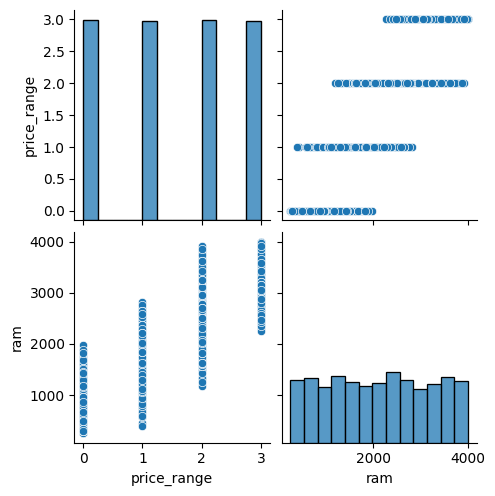

In [13]:
sns.pairplot(train_data[['price_range','ram']])

array([[<AxesSubplot: title={'center': 'price_range'}>]], dtype=object)

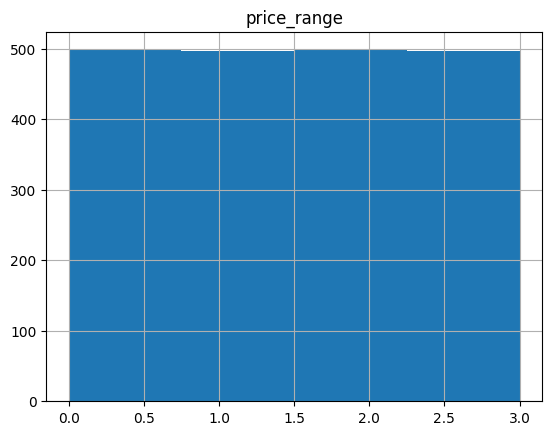

In [14]:
train_data.hist(column='price_range', bins=4) 
# the price is balanced .. it is uniformllay distributed .. ^_^

the test data

In [15]:
test_data = pd.read_csv('test.csv')
l =test_data.head(0)
test_data.info()
#train_data.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

define the input and the output ... and define the model ,,, here logistic regression is used 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature = max_corr #['ram','px_height','px_width','battery_power']
label = ['price_range']
X,y = train_data[feature].values, train_data[label].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
#Define Preprocessing for Numeric Columns
num_features = [0,1,2,3]
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_features)])
pipeline_lr = Pipeline(steps= [('preprocessing', preprocessor),('logregression', LogisticRegression( max_iter = 50000))]) 
# do logregression .. 

model_lr = pipeline_lr.fit(X_train,y_train)
print(model_lr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('logregression', LogisticRegression(max_iter=50000))])


c:\Users\wissam\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#Check accuracy using confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
predictionl = model_lr.predict(X_test)
cm_result = confusion_matrix(y_test, predictionl) # how accurate the classificathion is
# the number in the diagonal is the write classificated elements number .. the other numbers
# at the same column refer to wrong predicted class !! 
print(pd.DataFrame(cm_result))
print('Accuracy : ', accuracy_score(y_test, predictionl))

     0    1    2    3
0  125    7    0    0
1    6  101    5    0
2    0   14  113   12
3    0    0    9  106
Accuracy :  0.893574297188755


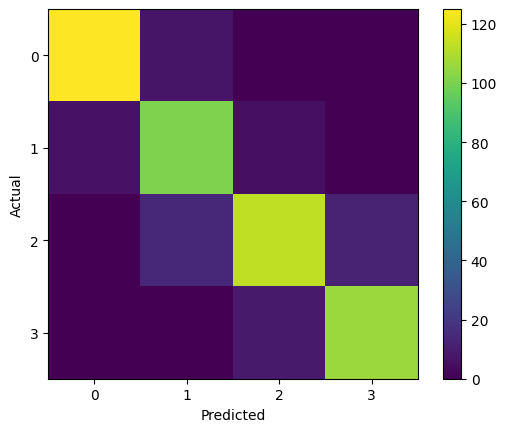

In [24]:
#Plot Confusion Matrix
price_class = [0,1,2,3]
plt.imshow(cm_result, interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(price_class))
plt.xticks(tick_marks, price_class)
plt.yticks(tick_marks, price_class)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()